# TS TP2

---

 Davidson Lova RAZAFINDRAKOTO 

---

### Note 1

$f = \frac{f_c}{s}*f_s \Leftrightarrow s = \frac{f_c * f_s}{f}$

* $f_s$ : fréquence d'échantillonage
```Python
f_s = int(len(s)/(0.46 - 0.25))
```

* $f_c$ : fréquence centrale de $\psi$

```Python
f_c = pywt.central_frequency(wt)
```

* $f$ : fréquence associé à l'échelle $s$

```Python
f_max = f_s//2
f_min = (fc*f_s)/(len(s)/2)
f_min = max(1, f_min)

f = np.linspace(f_min, f_max, nb_freq)
```



### Note 2

```Python
import numpy as np
import cwt

nb_freq = 200

f_min = (f_c * f_s)/(len(signal)/2)

f_min = np.max(f_min, 1)

#f_max = f_s/2

f_max = 1000

freq = np.linspace(f_min, f_max, nb_freq)

scales = (f_s * f_q)/freq

scales = scales[-1::1]

coeff,  fr = pywt.cwt(signal, scales, "cmorv1.5-1", 1/f_s)

```

### Note 3

Pour avoir se débarasser des valeurs très grandes qui assombri le spectrogramme

```Python
p = 0.005

imsort = np.sort(im.flatten())
ind_min = (int)(len(imsort)*p)
ind_max = (int)(len(imsort)*(1-p))
a = imsort[ind_min]
b = imsort[ind_max]

plt.imshow(im, ..., vmin = a, vmax = b)

```

## Signal analytique

$\hat{f}_a (\omega) = 2 \hat{f}$ si $\omega > 0$ et $0$ sinon

$f = Re(f_a)$

$f_a(t) = A(t) e^{i \phi(t)}$ avec $\phi$ la phase

et $f = A(t) cos(\phi(t))$

fréquence instantanée : $\frac{\phi'(t)}{2 \pi} \approx \frac{\phi(t + \Delta) - \phi(t)}{\Delta \pi}$

Déterminer $\phi(t)$ et $A(t)$

Hilbert : $f \mapsto f_a$

* $A(t) = \lVert f_a(t) \rVert$

* $\phi(t) = ?$

$e^{i \phi(t)} = cos(\phi(t)) + i sin(\phi(t))$

$tan(\phi(t)) = \frac{sin(\phi(t))}{cos(\phi(t))}$

$\phi(t) = \theta + 2 \pi k(t)$ avec $\theta \in [-\pi, \pi]$

$y = sin(\phi(t))$

$x = cos(\phi(t))$

```Python
theta = np.arctan2(y,x)
```

En préservant le plus possible la régularité on peut déterminer $k(t)$

<img src="./theta.png" />

<img src="./phi.png" />

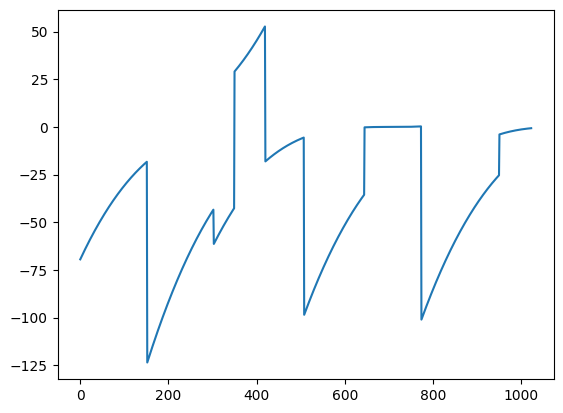

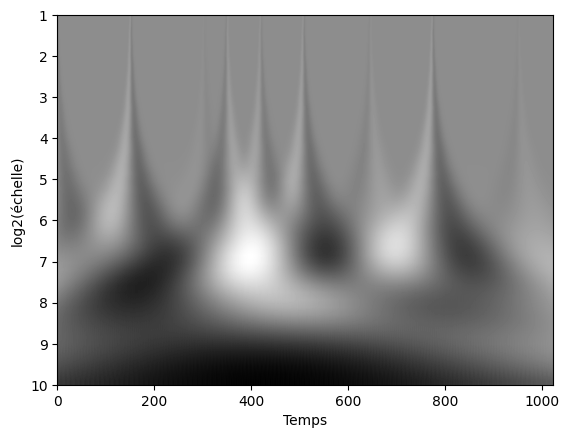

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import scipy

def cwtanalyse(signal, time, wavelet, nb_echelles): 

    # f_s = int (len(signal)/(time[1] - time[0]))
    # p = 2
    # f_c = pywt.central_frequency(wavelet)
    
    # f_max = f_s//2
    # f_min = (f_c*f_s)/(len(signal)/2)
    # f_min = max(1, f_min)
    # f = np.linspace(f_min, f_max, nb_echelles)

    # scales = (f_s * f_c)/f
    # scales = scales[-1::1]

    # return pywt.cwt(signal, scales, wavelet, sampling_period = 1/f_s)
    J=int(np.log2(len(signal)))
    log2scales=np.linspace(1,J,nb_echelles)
    scales=np.power(2,log2scales)
    delta=time[1]-time[0]
    coeff,freq=pywt.cwt(signal,scales,wavelet,time[1]-time[0])
    plt.imshow(coeff,extent=[time[0],time[-1],log2scales[-1]+np.log2(delta),log2scales[0]+np.log2(delta)],cmap='gray',interpolation='bilinear',aspect='auto')
    plt.ylabel('log2(échelle)')
    plt.xlabel('Temps')
    #
sig_poly = np.fromfile("polypiecewise.dat")
wt = "gaus{}".format(2)
ech=20
time=np.arange(len(sig_poly))
plt.figure()
plt.plot(sig_poly)
plt.figure()
cwtanalyse(sig_poly,time,wt,50)

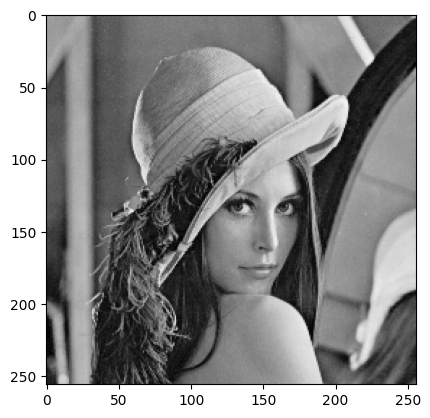

In [2]:
#lenat=np.fromfile('lena.tif')
#plt.imshow(lena,cmap='gray')
imagel=image.imread('lena.tif')
plt.imshow(imagel,cmap='gray')


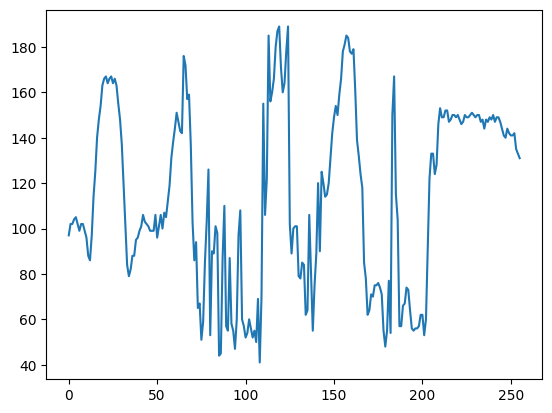

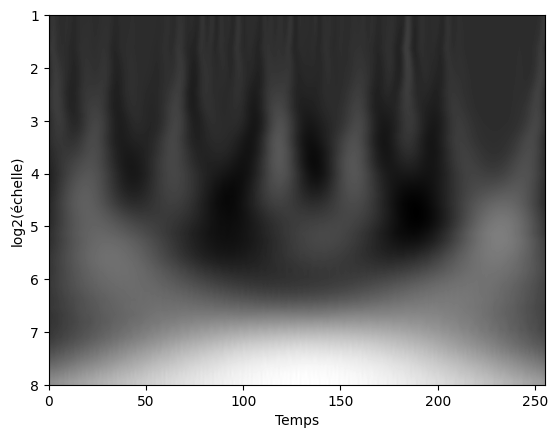

In [3]:
m=imagel[len(imagel)//2]
time_l=np.arange(len(m))
plt.figure()
plt.plot(m)
plt.figure()
cwtanalyse(m,time_l,wt,50)

In [4]:
import os 
os.chdir(os.getcwd())

In [5]:
from brownian import brownian
import pylab as plt
intv = [0,1]
delta = 2
n_ech = 2
T = intv[1] - intv[0]
f_s = 500
N = f_s*(intv[1] - intv[0])
dt = T/f_s
s_b = np.empty(N+1)
s_b[0] = 0
s_b = brownian(s_b[0], N, dt, delta, out = s_b[1:])
t = np.linspace(0.0, N*dt, N)



plt.subplots(2,1, figsize = (5,5))
plt.subplot(2,1,1)
plt.plot(t, s_b)
P = 2
wt = "gaus{}".format(P)
coeff_b, frequencies_b = cwtanalyse(s_b, intv, wt, n_ech)


plt.subplot(2,1,2)
plt.imshow(coeff_b,cmap='gray', interpolation= 'bilinear', aspect= 'auto')

ImportError: cannot import name 'brownian' from 'brownian' (/home/ing/.local/lib/python3.8/site-packages/brownian/__init__.py)

TypeError: cannot unpack non-iterable NoneType object

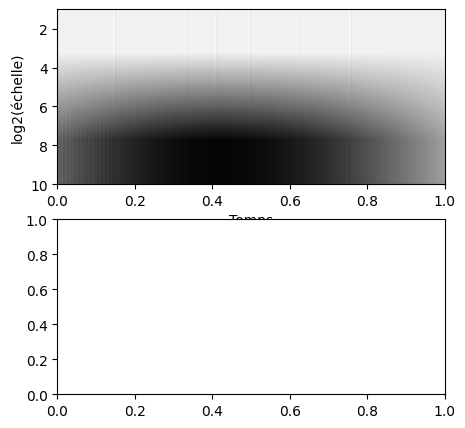

In [6]:
sig_poly = np.fromfile("polypiecewise.dat")

plt.subplots(2,1, figsize = (5, 5))
plt.subplot(2,1,1)
plt.plot(sig_poly)
n_ech = 2
P = 2
wt = "gaus{}".format(P)
coeff_poly, frequencies_poly = cwtanalyse(sig_poly, [0, 1], wt, n_ech)

plt.subplot(2,1,2)
plt.plot(coeff_poly[0])

## Notes
$R(x)=

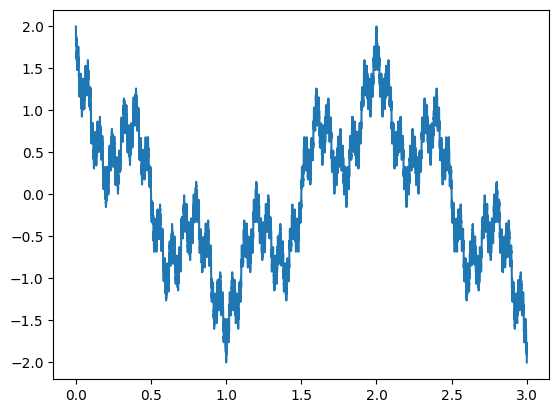

In [13]:
def weirstrass(A,B,x,n=100):
    y=np.zeros(x.shape)
    for i in range(n+1):
        y += A**i * np.cos(B**i * np.pi * x)
    return y
x=np.linspace(0,3,2**14)
plt.plot(x,weirstrass(0.5,5,x,n=100))


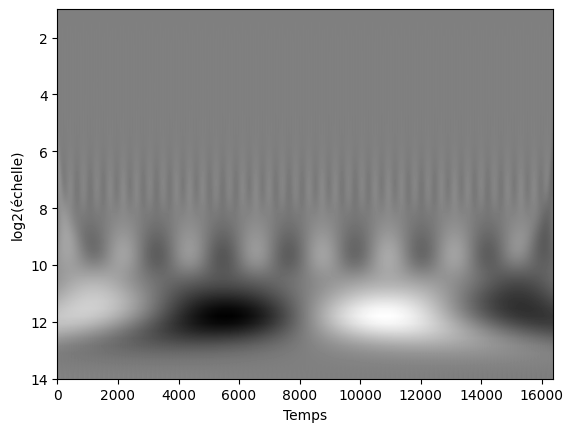

In [14]:
we=weirstrass(0.5,5,x,n=100)
tim_w=np.arange(len(we))
cwtanalyse(we,tim_w,wt,50)

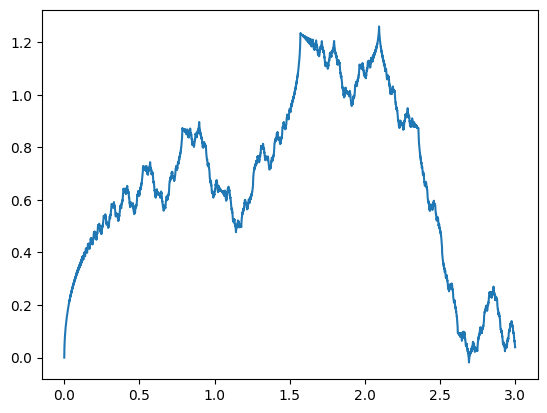

In [12]:
def rieman(x,n=100):
    y=np.zeros(x.shape)
    for k in range(1,n+1):
        y+=np.sin(k*k*x)/(k*k)
    return y
#
x=np.linspace(0,3,2**14)
plt.plot(x,rieman(x,n=100))

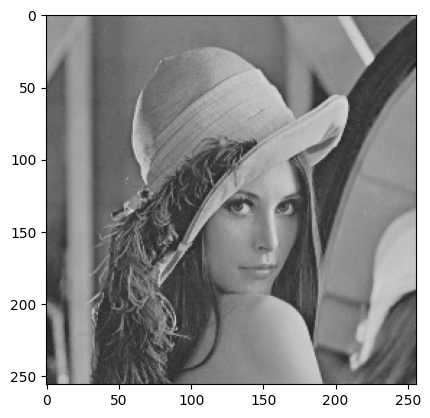

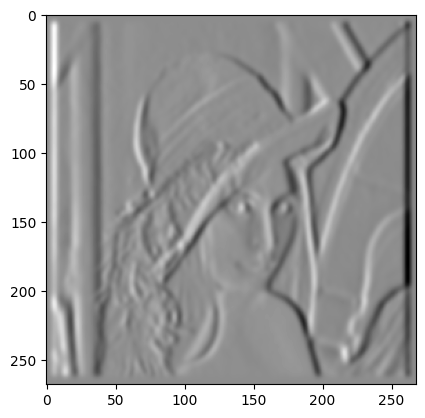

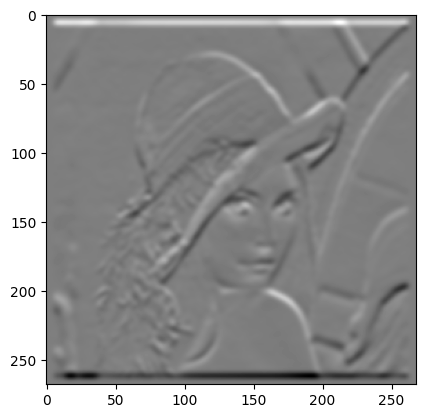

In [25]:
def detection(im,scale,sigma,threshold):
    sigma_scaled=scale*sigma
    t=int(3*sigma_scaled+0.5)
    x_p=np.arange(1,t+1)
    x_m=-x_p
    x=np.concatenate((x_m[::-1],[0],x_p))
    dgauss=-x/(sigma_scaled**2)*np.exp(-0.5*(x/sigma_scaled)**2)

    gauss=np.exp(-0.5*(x/sigma_scaled)**2)
    fil_dx=np.outer(gauss,dgauss)
    fil_dy=np.outer(dgauss,gauss)
    dx=scipy.signal.fftconvolve(im,fil_dx)
    dy=scipy.signal.fftconvolve(im,fil_dy)

    G=np.sqrt(dx**2+dy**2)
    G_sort=np.sort(G.ravel())
    ind=int(len(G_sort)*threshold)
    T=G_sort[ind]
    D=(G>=T)
    
    return dx,dy,G,D

im=plt.imread('lena.tif').astype(np.float32)
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.show()
sigma=1
dx,dy,G,D=detection(im,2,sigma,threshold=0.75)
plt.imshow(dx,cmap='gray')
plt.figure()
plt.imshow(dy,cmap='gray')


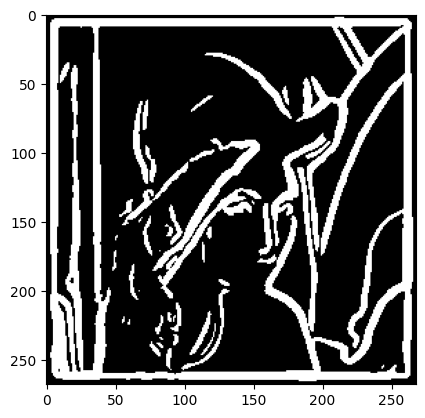

In [26]:
plt.imshow(D,cmap='gray')

In [ ]:
pywt.wavedec
pywt.waverec
pywt.threshold

In [11]:
def decomposition(data,wt,level):
    maxlevel=pywt.dwt_max_level(len(data),wt.dec_len)
    level=min(maxlevel,level)
    coeffs=pywt.wavedec(data,wt,level=level)
    plt.figure()
    plt.title('coeffiscient de décomposition')
    for i in range(0,level+1):
        plt.subplot(level+1,1,i+1)
        plt.plot(coeffs[i])
    plt.show()
    plt.figure()
    plt.title('decomposition de signal')
    for j in range(0,level+1):
        co=coeffs.copy()
        for k in range(0,level+1):
            if k!=j:
                co[k]=np.zeros(coeffs[k].size)
        rec=pywt.waverec(co,wt)
        plt.subplot(level+1,1,j+1)
        plt.plot(rec)
    #return coeffs

/tmp/ipykernel_5327/1363284159.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(level+1,1,i+1)


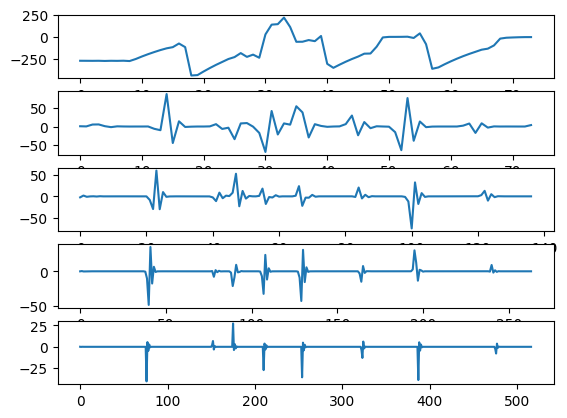

/tmp/ipykernel_5327/1363284159.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(level+1,1,j+1)


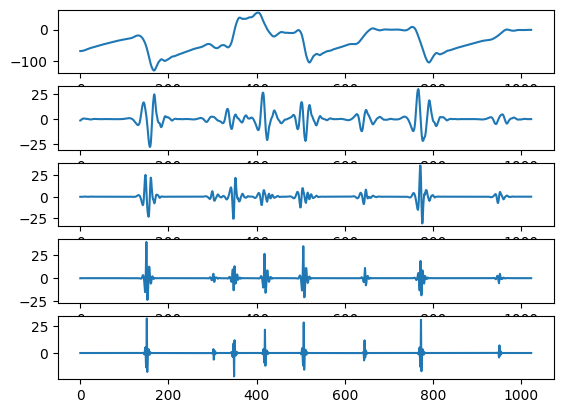

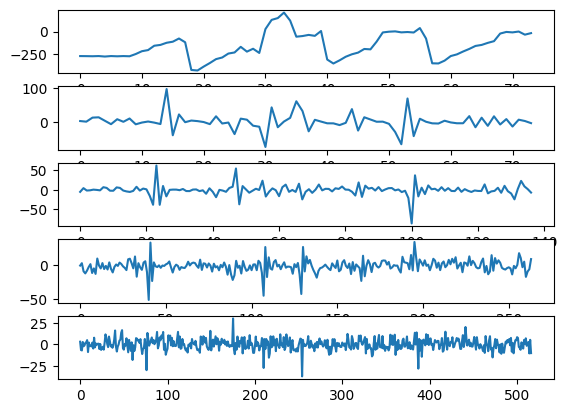

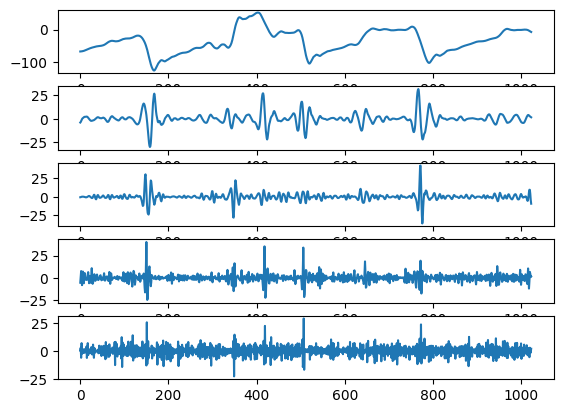

In [12]:
wt=pywt.Wavelet('db6')# 'sym4'
decomposition(sig_poly,wt,4)
sigma=6
datab=sig_poly+np.random.randn(sig_poly.size)*sigma
decomposition(datab,wt,4)

In [26]:
def denoising(datab,wt,level,rho):
    level=min(level,pywt.dwt_max_level(len(sig_poly),wt.dec_len))
    coeffs=pywt.wavedec(datab,wt,level=level)
    coeffs_w=coeffs[1:]
    co=np.concatenate(coeffs_w)
    sig=np.median(np.abs(co))/0.6745
    T=sig*np.sqrt(2*np.log(co.size))*rho
    for i in range(1,level+1):
        coeffs[i]=pywt.threshold(coeffs[i],value=T,mode='soft')
    res=pywt.waverec(coeffs,wt)
    return (res,sig,T)

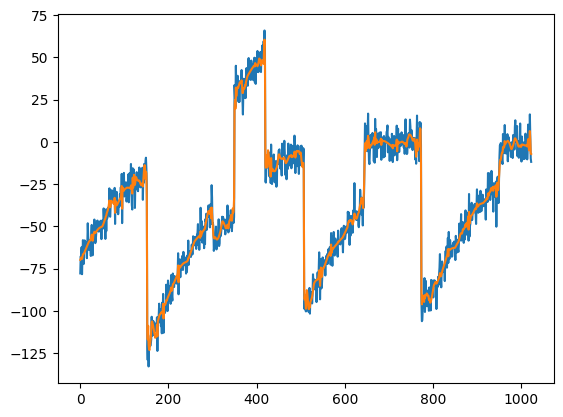

In [27]:
wt=pywt.Wavelet('sym4')
(res,sig,T) = denoising(datab,wt,4,0.4)
plt.plot(datab)
plt.plot(res)

In [28]:
def SNR(data,datab):
    d=data.ravel()
    db=datab.ravel()
    b=db-d
    d_energy=np.abs(d**2).sum()
    b_energy=np.abs(b**2).sum()
    snr=10*np.log10(d_energy/b_energy)
    return snr

In [29]:
datab1=sig_poly+np.random.randn(sig_poly.size)*sigma
(res,sig,T)=denoising(datab1,wt,4,0.4)
snrb=SNR(sig_poly,datab1)
snrr=SNR(sig_poly,res)
print(f'SNR signal bruité {snrb}')
print(f'SNR signal restauré {snrr}')

SNR signal bruité 18.8762733007698
SNR signal restauré 24.90389341839231


In [34]:
def translation(data,t):
    data1=data[-t:]
    data2=data[:-t]
    return np.concatenate((data1,data2))

def denoisingTi(data,wt,level,nb,rho):
    nb=min(nb,len(data))
    res=np.zeros(data.size)
    for t in range(nb):
        r,sig,T=denoising(translation(data,t),wt,level,rho)
        res+=translation(r,-t)
        res=res/nb
    return res


In [35]:
def denoisingTiS(data,wt,level,nb,margin,rho):
    margin=int(min(margin,len(data)/2))
    data1=data[-2:-(margin+2):-1]
    data2=data[margin:0:-1]
    data=np.concatenate((data2,data,data))
    res=denoisingTi(data,wt,level,nb,rho)
    res=res[margin:-margin]
    return res

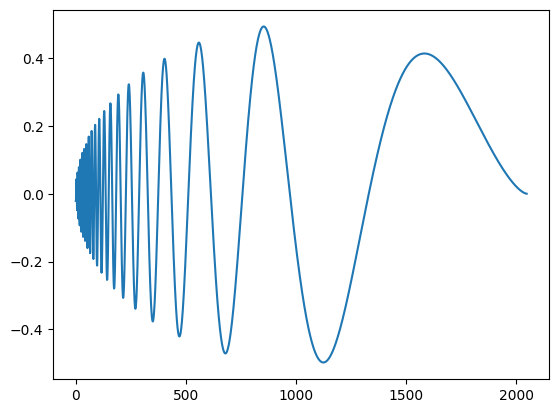

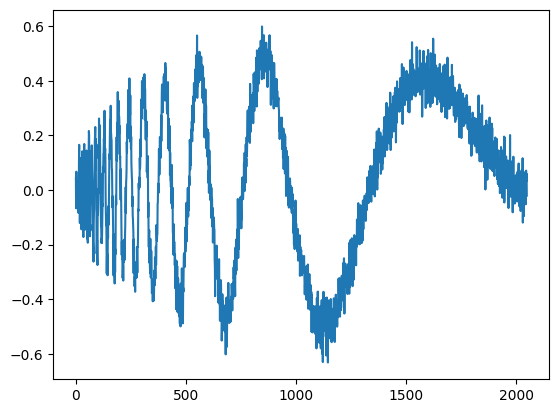

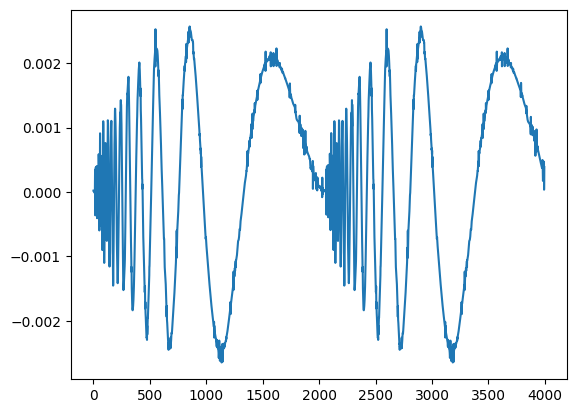

In [47]:
data=pywt.data.demo_signal(name='Doppler',n=2048)
datab=data+np.random.randn(data.size)*0.05
nb=200
margin=100
r=denoisingTiS(datab,wt,6,nb,margin,0.4)

plt.plot(data)
plt.figure()
plt.plot(datab)
plt.figure()
plt.plot(r)
